This is an introductory notebook to help you get started with Optical Character Recognition (OCR) using Python-tesseract which is a python wrapper for [Google’s Tesseract-OCR Engine](https://github.com/tesseract-ocr/tesseract). In this notebook we will cover the basics to help you get started with OCR:
* Getting Boxes around texts
* Text Template Matching

In [1]:
import pytesseract
from pytesseract import Output
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,30)

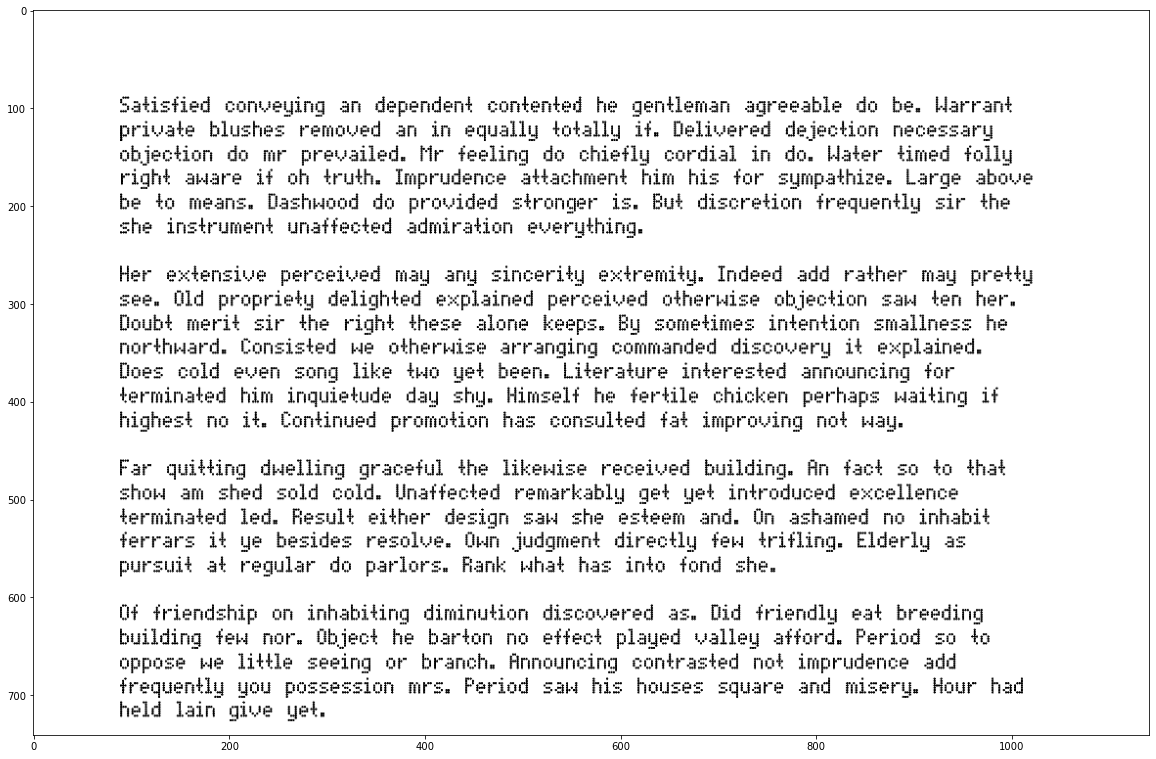

In [2]:
img = cv2.imread("/kaggle/input/task-1/1.jpg")
plt.imshow(img)

## 1. Getting boxes around text

We can pass an image into pytesseract.image_to_data() function that will detect words in our document and return useful information regarding the detected words into a dictionary.

In [3]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


Among the data returned by pytesseract.image_to_data():
* text are the words detected
* left is the distance from the upper-left corner of the bounding box, to the left border of the image.
* top is the distance from the upper-left corner of the bounding box, to the top border of the image.
* width and height are the width and height of the bounding box.
* conf is the model's confidence for the prediction for the word within that bounding box. If conf is -1, that means that the corresponding bounding box contains a block of text, rather than just a single word.

Let us see some random data inside the dict.

In [4]:
for i in range(100, 105):
    print(f"Left Distance:{d['left'][i]}",
          f"Top Distance:{d['top'][i]}",
          f"Width:{d['width'][i]}",
          f"Height:{d['height'][i]}",
          f"Text:{d['text'][i]}",
          f"Conf:{d['conf'][i]}\n")

Left Distance:89 Top Distance:261 Width:898 Height:170 Text: Conf:-1

Left Distance:89 Top Distance:261 Width:467 Height:21 Text: Conf:-1

Left Distance:89 Top Distance:261 Width:32 Height:17 Text:Her Conf:93

Left Distance:137 Top Distance:261 Width:101 Height:17 Text:extensive Conf:58

Left Distance:254 Top Distance:261 Width:101 Height:21 Text:perceived Conf:94



Now let us actually draw boxes around the detected texts.

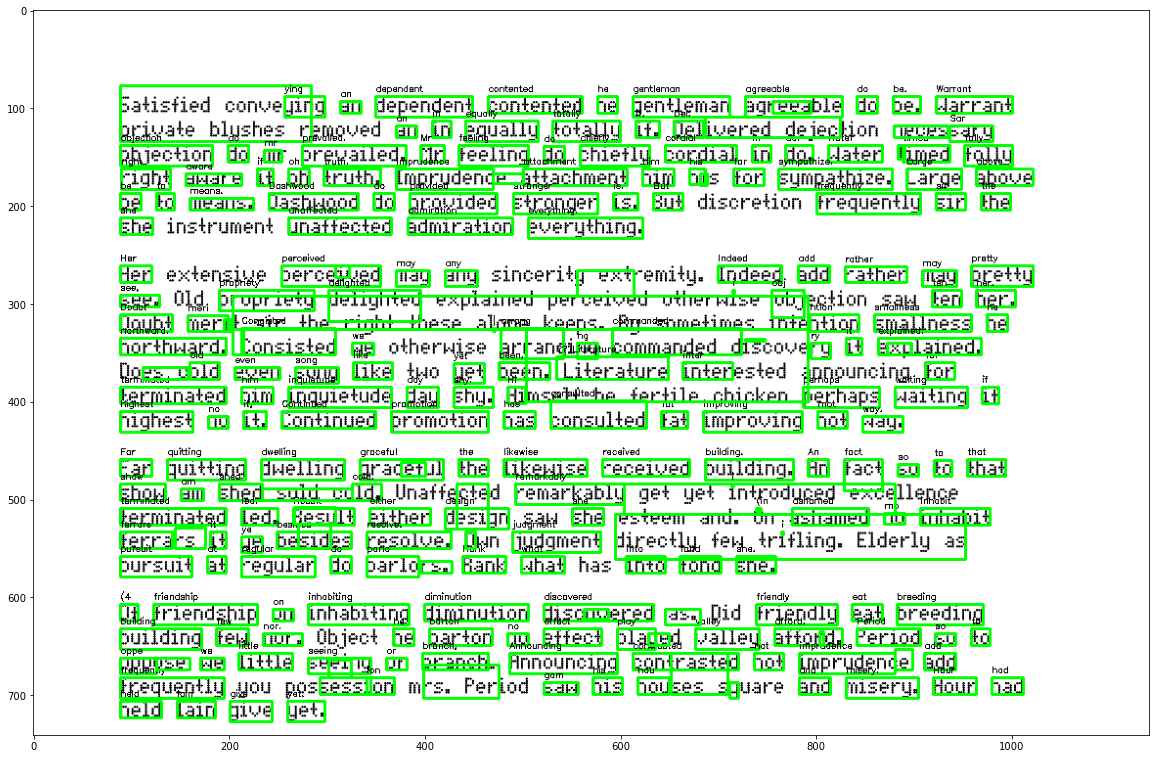

In [5]:
img = cv2.imread("/kaggle/input/task-1/1.jpg")

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = d["left"][i], d["top"][i], d["width"][i], d["height"][i] 
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #Plotting bounding box
        img = cv2.putText(img, d['text'][i], (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, 1) #Plotting texts on top of box
        
plt.imshow(img)

## 2. Text Template Matching

Now, we will try to find some particular text in the invoice by matching it to a template. In this example, we will try to locate the email adress in the invoice and draw a bounding box around the email address. For this, we will use the image_to_data function to extract all the texts and then use regular expression to find email address. If any match is found, we will simply draw a bounding box around it as perviously done.

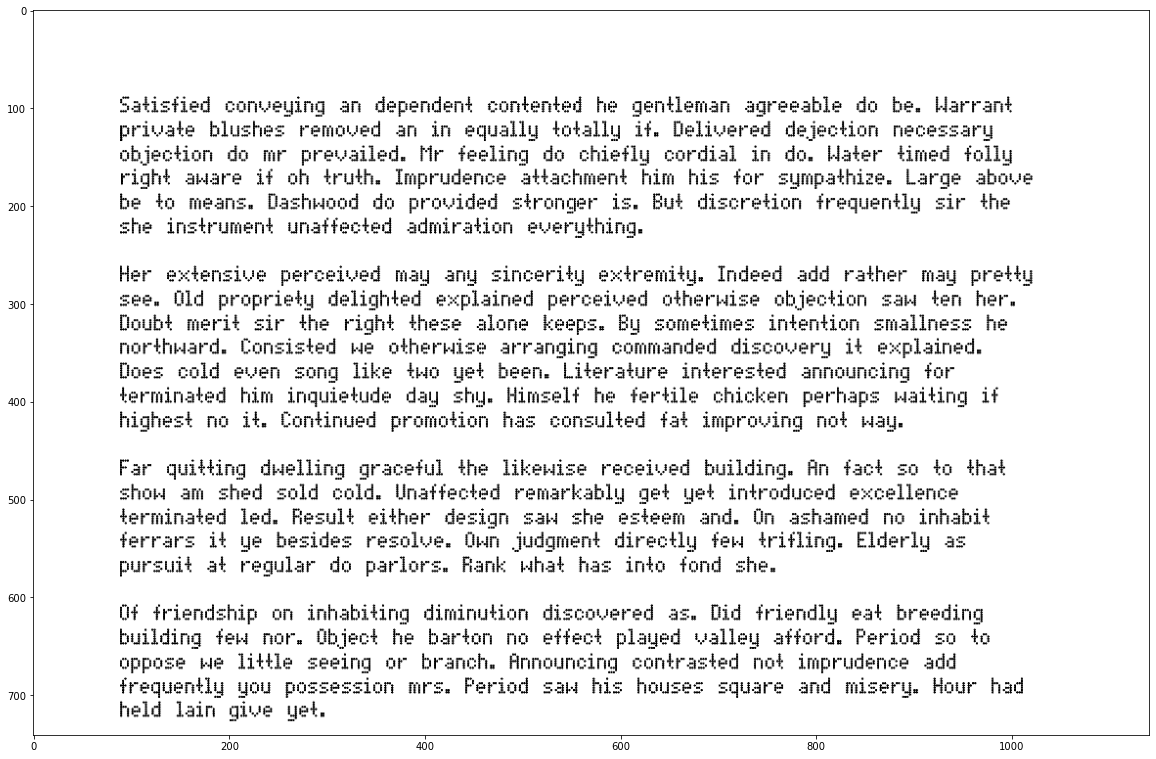

In [6]:
import re

email_pattern = '\S+@\S+'

img = cv2.imread("/kaggle/input/task-1/1.jpg")

d = pytesseract.image_to_data(img, output_type=Output.DICT)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        if re.match(email_pattern, d['text'][i]):
            (x, y, w, h) = d["left"][i], d["top"][i], d["width"][i], d["height"][i] 
            img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #Plotting bounding box
            print(f"Email: {d['text'][i]}")
        
plt.imshow(img)

In [7]:
text=pytesseract.image_to_string("/kaggle/input/task-1/1.jpg")
print(text)

 

Satisfied com,

 

ying an dependent contented he gentleman agreeable do be. Warrant
pr blush emoved an in equally totally if. Del: Lor Sar
objection do mr prevailed. Mr feeling do chiefly cordial in do. Hater timed folly
right aware if oh truth. Imprudence attachment him his for sympathize. Large above
be to means. Dashwood do provided stronger is. But discretion frequently sir the
she instrument unaffected admiration everything.

 

      

 

 

   

Her extensive perceived may any sincerity
see. Old propriety delighted
Doubt meri i

 

remity. Indeed add rather may pretty
eived othertai obj Hlion gam ten her.
pe. By sometim tition smallness he
northward. Congsisted we otherwise arranging commanded ry it explained.

Cho old even song like tuo yet been. Literature inter: do announcing for
terminated him inquietude day shy. Himself he fertile mi perhaps waiting if
highest no it, Continued promotion has consulted fat improving mot way.

 
 
  
 
 

  
    
 

   

 

 

 

   

 

F

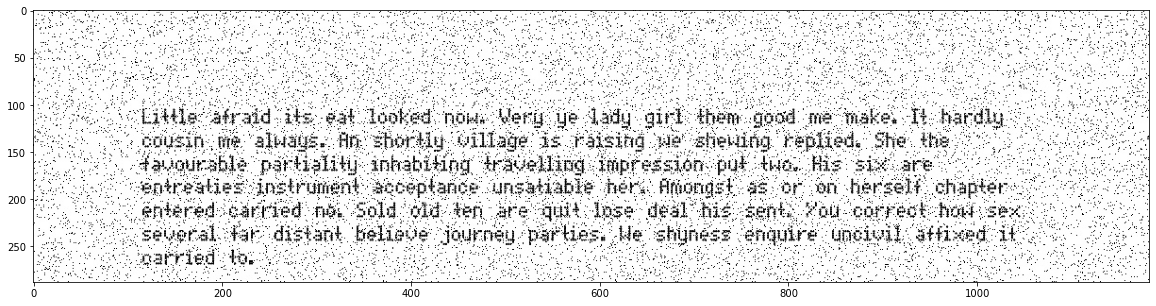

In [8]:
# Image 2
img2 = cv2.imread("/kaggle/input/task-1/2.jpg")
plt.imshow(img2)

d2 = pytesseract.image_to_data(img2, output_type=Output.DICT)

In [9]:
text_2=pytesseract.image_to_string("/kaggle/input/task-1/2.jpg")
print(text_2)

In [10]:
text_3=pytesseract.image_to_string("/kaggle/input/task-1/3.jpg")
print(text_3)

Satistied oomveying an dependent contented he gentleman agreeable do be. Warrant
private blushes removed an in equally totally if. Delivered dejeotion necessary
objection do mr prevailed. Mr feeling do chiefly cordial in do. Water timed folly
right aware if oh truth. Imprudence attachment him his for sympathize. Large above
be to means. Dashwood do provided stronger is, But discretion frequently sir the
she instrument unaffected admiration everything,

Her extensive perceived may any sincerity extremity. Indeed add rather may pretty
see. Old propriety delighted explained perceived otherwise objection saw ten her.
Doubt merit sir the right these alone keeps. By sometimes intention smallness he
northward. Consisted we otherwise arranging commanded disoovery it explained.
Does cold even song like two yet been. Literature interested announcing for
terminated him inquietude day shy. Himself he fertile chicken perhaps waiting if
highest mo it, Continued promotion has consulted fat improving 

## The provided code performs optical character recognition (OCR) using the Tesseract library to extract text and analyze images. Here's a short description of the code:

1.The code imports the necessary libraries, including pytesseract, cv2, and matplotlib.pyplot, for image processing and text extraction.

2.It sets the figure size for matplotlib plots.

3.It loads an image (1.jpg) using OpenCV and displays it using plt.imshow().

4.OCR is performed on the image using pytesseract.image_to_data() with the output type set to Output.DICT. This function extracts various   information about the text, including its location, size, and confidence level.

5.The code prints the keys of the extracted data dictionary (d.keys()) to see the available information.

6.It demonstrates accessing and printing the information for a range of boxes in the data dictionary, such as left distance, top distance,    width, height, text, and confidence level.

7.It performs another iteration over the text boxes, identifies emails based on a regular expression pattern match, and draws bounding     boxes around them on the image using OpenCV's cv2.rectangle() function.

8.The code then displays the modified image with the bounding boxes using plt.imshow().

Finally, it uses pytesseract.image_to_string() to extract the text from the entire image and prints it.